<a href="https://colab.research.google.com/github/rhs329/boostcourse-3-/blob/main/3.1.8~3.1.9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df=pd.read_csv("/content/diabetes.csv")
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#나이

In [ ]:
# One=Hot-Encoding
df["Age_low"] = df["Age"] < 25
df["Age_middle"] = (df["Age"] >= 25) & (df["Age"] <= 60)
df["Age_high"] = df["Age"] > 60
df[["Age", "Age_low", "Age_middle", "Age_high"]].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<Axes: xlabel='Age_low', ylabel='count'>

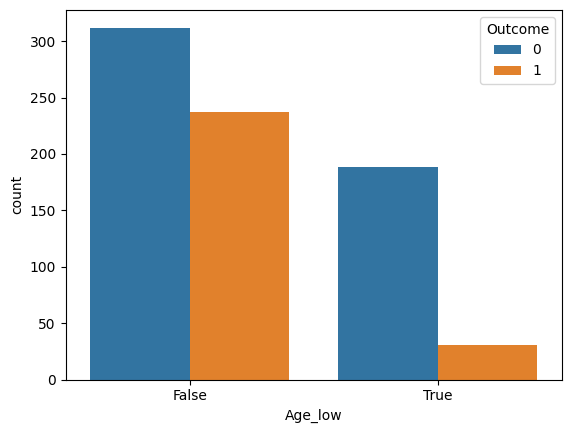

In [ ]:
sns.countplot(data=df, x = "Age_low", hue = "Outcome")

In [ ]:
# 결측치 다루기

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0
Age_low,0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)
df[["Insulin", "Insulin_nan"]].head()

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [ ]:
df["Insulin_nan"].isnull().sum()

np.int64(374)

In [ ]:
df["Insulin_nan"].isnull().mean()

np.float64(0.4869791666666667)

In [ ]:
df.groupby(["Outcome"])[["Insulin", "Insulin_nan"]].agg(["mean", "median"])

Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

In [ ]:
#결측치 세우기
df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 102.5
df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 169.5

In [ ]:
# 왜도, 첨

/tmp/ipython-input-3999794139.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df["Insulin"] > 0, "Insulin"])


<Axes: xlabel='Insulin', ylabel='Density'>

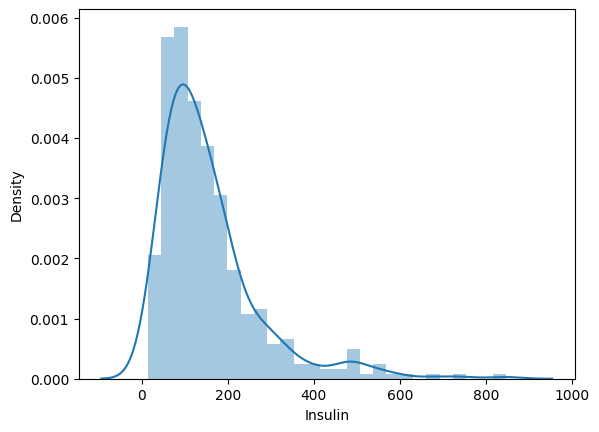

In [ ]:
sns.distplot(df.loc[df["Insulin"] > 0, "Insulin"])

/tmp/ipython-input-357358582.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df.loc[df["Insulin"] > 0, "Insulin"] + 1))


<Axes: xlabel='Insulin', ylabel='Density'>

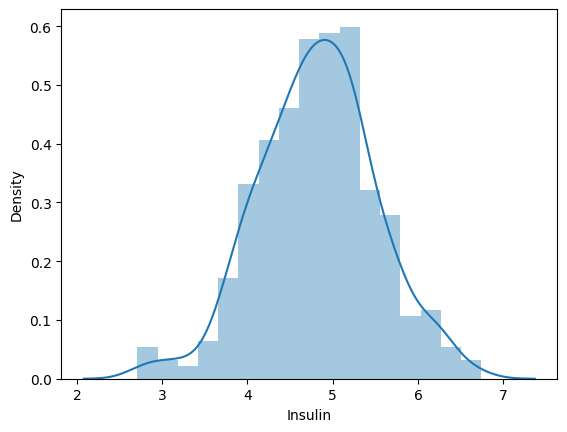

In [ ]:
sns.distplot(np.log(df.loc[df["Insulin"] > 0, "Insulin"] + 1))

/tmp/ipython-input-391338383.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Insulin_nan"])


<Axes: xlabel='Insulin_nan', ylabel='Density'>

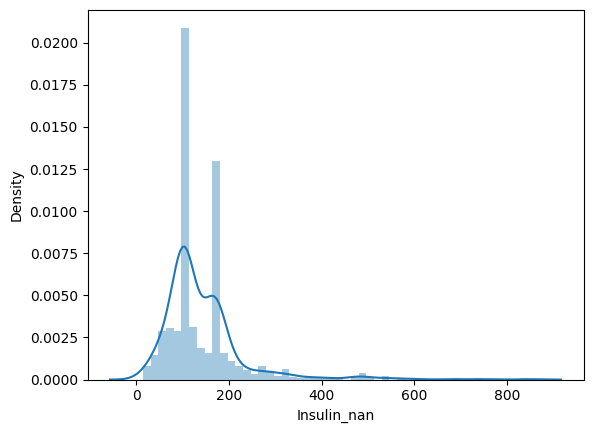

In [ ]:
sns.distplot(df["Insulin_nan"])

/tmp/ipython-input-557257811.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Insulin_log"])


<Axes: xlabel='Insulin_log', ylabel='Density'>

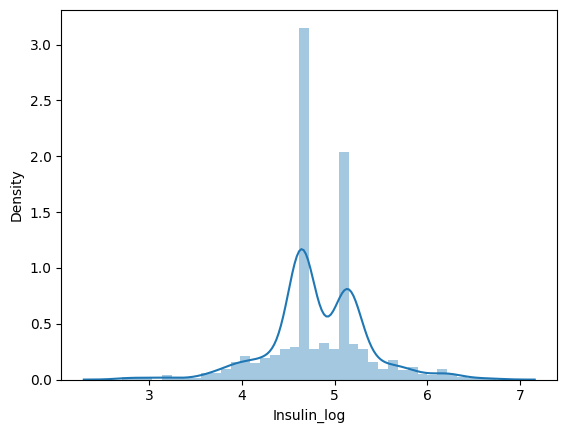

In [ ]:
df["Insulin_log"] = np.log(df["Insulin_nan"] + 1)
sns.distplot(df["Insulin_log"])

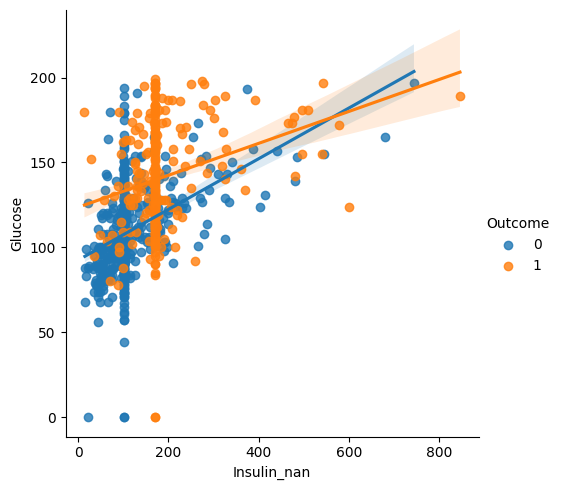

In [ ]:
sns.lmplot(data=df, x="Insulin_nan", y="Glucose", hue="Outcome")

In [ ]:
df["low_glu_insulin"] = (df["Glucose"] < 100) & (df["Insulin_nan"] <= 102.5)
df["low_glu_insulin"].head()

,low_glu_insulin
0,False
1,True
2,False
3,True
4,False


In [ ]:
pd.crosstab(df["Outcome"], df["low_glu_insulin"])

low_glu_insulin,False,True
Outcome,,
0,332,168
1,263,5


In [ ]:
# 이상치 다루기

<Axes: ylabel='Insulin_nan'>

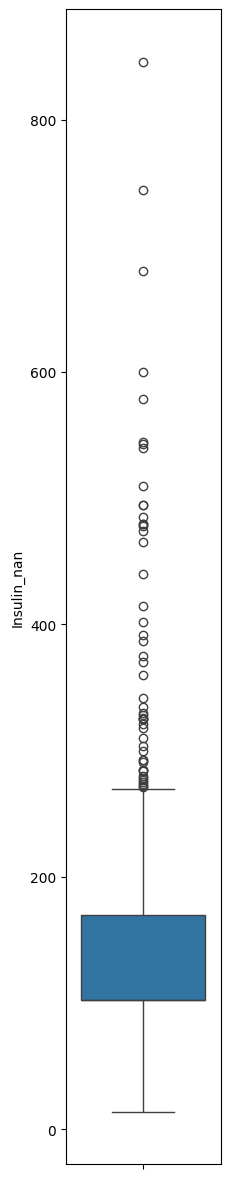

In [ ]:
plt.figure(figsize=(2, 15))
sns.boxplot(df["Insulin_nan"])

In [ ]:
df["Insulin_nan"].describe()

,Insulin_nan
count,768.000000
mean,141.753906
std,89.100847
min,14.000000
25%,102.500000
50%,102.500000
75%,169.500000
max,846.000000


In [ ]:
IQR3 = df["Insulin_nan"].quantile(0.75)
IQR1 = df["Insulin_nan"].quantile(0.25)
IQR = IQR3 - IQR1
IQR

np.float64(67.0)

In [ ]:
OUT = IQR3 + (IQR * 1.5)
OUT

np.float64(270.0)

In [ ]:
df[df["Insulin_nan"] > OUT].shape

(51, 15)

In [ ]:
#스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[["Glucose", "DiabetesPedigreeFunction"]])
scale = scaler.transform(df[["Glucose", "DiabetesPedigreeFunction"]])
scale

array([[ 0.84832379,  0.46849198],
       [-1.12339636, -0.36506078],
       [ 1.94372388,  0.60439732],
       ...,
       [ 0.00330087, -0.68519336],
       [ 0.1597866 , -0.37110101],
       [-0.8730192 , -0.47378505]])

In [ ]:
df[["Glucose", "DiabetesPedigreeFunction"]] = scale
df[["Glucose", "DiabetesPedigreeFunction"]].head()

,Glucose,DiabetesPedigreeFunction
0,0.848324,0.468492
1,-1.123396,-0.365061
2,1.943724,0.604397
3,-0.998208,-0.920763
4,0.504055,5.484909


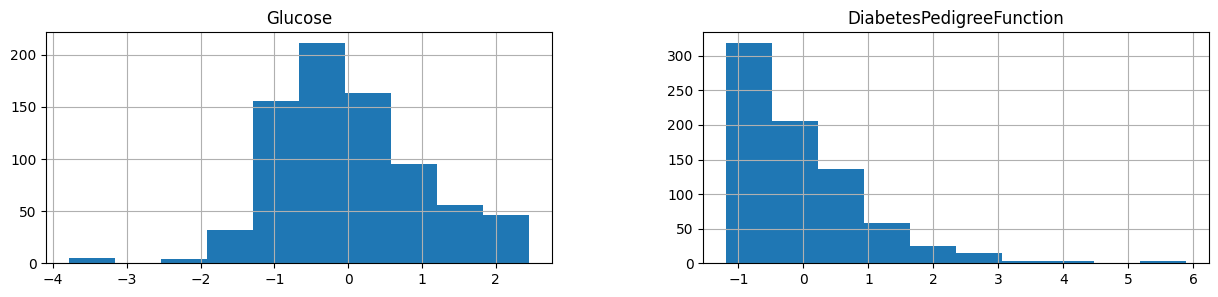

In [ ]:
h = df[["Glucose", "DiabetesPedigreeFunction"]].hist(figsize=(15, 3))

In [ ]:
#전처리한 피처 csv 파일 저장

In [ ]:
df.to_csv("diabetes_feature.csv", index=False)

In [ ]:
pd.read_csv("diabetes_feature.csv").head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,0.848324,72,35,0,33.6,0.468492,50,1,False,True,False,169.5,5.138735,False
1,1,-1.123396,66,29,0,26.6,-0.365061,31,0,False,True,False,102.5,4.639572,True
2,8,1.943724,64,0,0,23.3,0.604397,32,1,False,True,False,169.5,5.138735,False
3,1,-0.998208,66,23,94,28.1,-0.920763,21,0,True,False,False,94.0,4.553877,True
4,0,0.504055,40,35,168,43.1,5.484909,33,1,False,True,False,168.0,5.129899,False


In [ ]:
split_count = int(df.shape[0] * 0.8)
split_count

614

In [ ]:
train = df[:split_count].copy()
train.shape

(614, 15)

In [ ]:
train[train["Insulin_nan"] < 600].shape

(610, 15)

In [ ]:
train = train[train["Insulin_nan"] < 600]
train.shape

(610, 15)

In [ ]:
test = df[split_count:].copy()
test.shape

(154, 15)

In [ ]:
feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names.remove("Insulin")
feature_names.remove("Insulin_log")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Insulin_nan',
 'low_glu_insulin']

In [ ]:
label_name = "Outcome"
label_name

'Outcome'

In [ ]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(610, 8)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Insulin_nan,low_glu_insulin
0,0.848324,72,35,33.6,0.468492,50,169.5,False
1,-1.123396,66,29,26.6,-0.365061,31,102.5,True
2,1.943724,64,0,23.3,0.604397,32,169.5,False
3,-0.998208,66,23,28.1,-0.920763,21,94.0,True
4,0.504055,40,35,43.1,5.484909,33,168.0,False


In [ ]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(610,)


,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Insulin_nan,low_glu_insulin
614,0.535352,74,26,36.1,0.257084,50,144.0,False
615,-0.466156,72,0,25.8,-0.799958,27,102.5,False
616,-0.121888,96,0,28.7,-0.950964,30,102.5,False
617,-1.655448,62,13,20.1,-0.648952,23,15.0,True
618,-0.278373,82,24,28.2,2.446670,50,169.5,False


In [ ]:
y_test = test[label_name]

print(y_test.shape)
y_test.head()

(154,)


,Outcome
614,1
615,0
616,0
617,0
618,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1])

[Text(0.5481770833333334, 0.9615384615384616, 'Insulin_nan <= 143.5\ngini = 0.453\nsamples = 610\nvalue = [399.0, 211.0]'),
 Text(0.3298611111111111, 0.8846153846153846, 'Insulin_nan <= 109.0\ngini = 0.163\nsamples = 380\nvalue = [346, 34]'),
 Text(0.4390190972222222, 0.9230769230769231, 'True  '),
 Text(0.25, 0.8076923076923077, 'BMI <= 49.95\ngini = 0.098\nsamples = 329\nvalue = [312, 17]'),
 Text(0.2361111111111111, 0.7307692307692307, 'Glucose <= 0.958\ngini = 0.082\nsamples = 326\nvalue = [312, 14]'),
 Text(0.2013888888888889, 0.6538461538461539, 'Insulin_nan <= 99.5\ngini = 0.062\nsamples = 312\nvalue = [302, 10]'),
 Text(0.1875, 0.5769230769230769, 'Insulin_nan <= 95.5\ngini = 0.154\nsamples = 119\nvalue = [109, 10]'),
 Text(0.1736111111111111, 0.5, 'BloodPressure <= 83.0\ngini = 0.127\nsamples = 117\nvalue = [109, 8]'),
 Text(0.1111111111111111, 0.4230769230769231, 'DiabetesPedigreeFunction <= 0.621\ngini = 0.088\nsamples = 108\nvalue = [103, 5]'),
 Text(0.05555555555555555, 0.

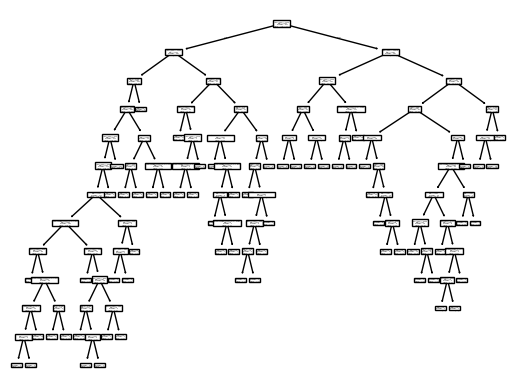

In [ ]:
from sklearn.tree import plot_tree

plot_tree(model, feature_names=feature_names)

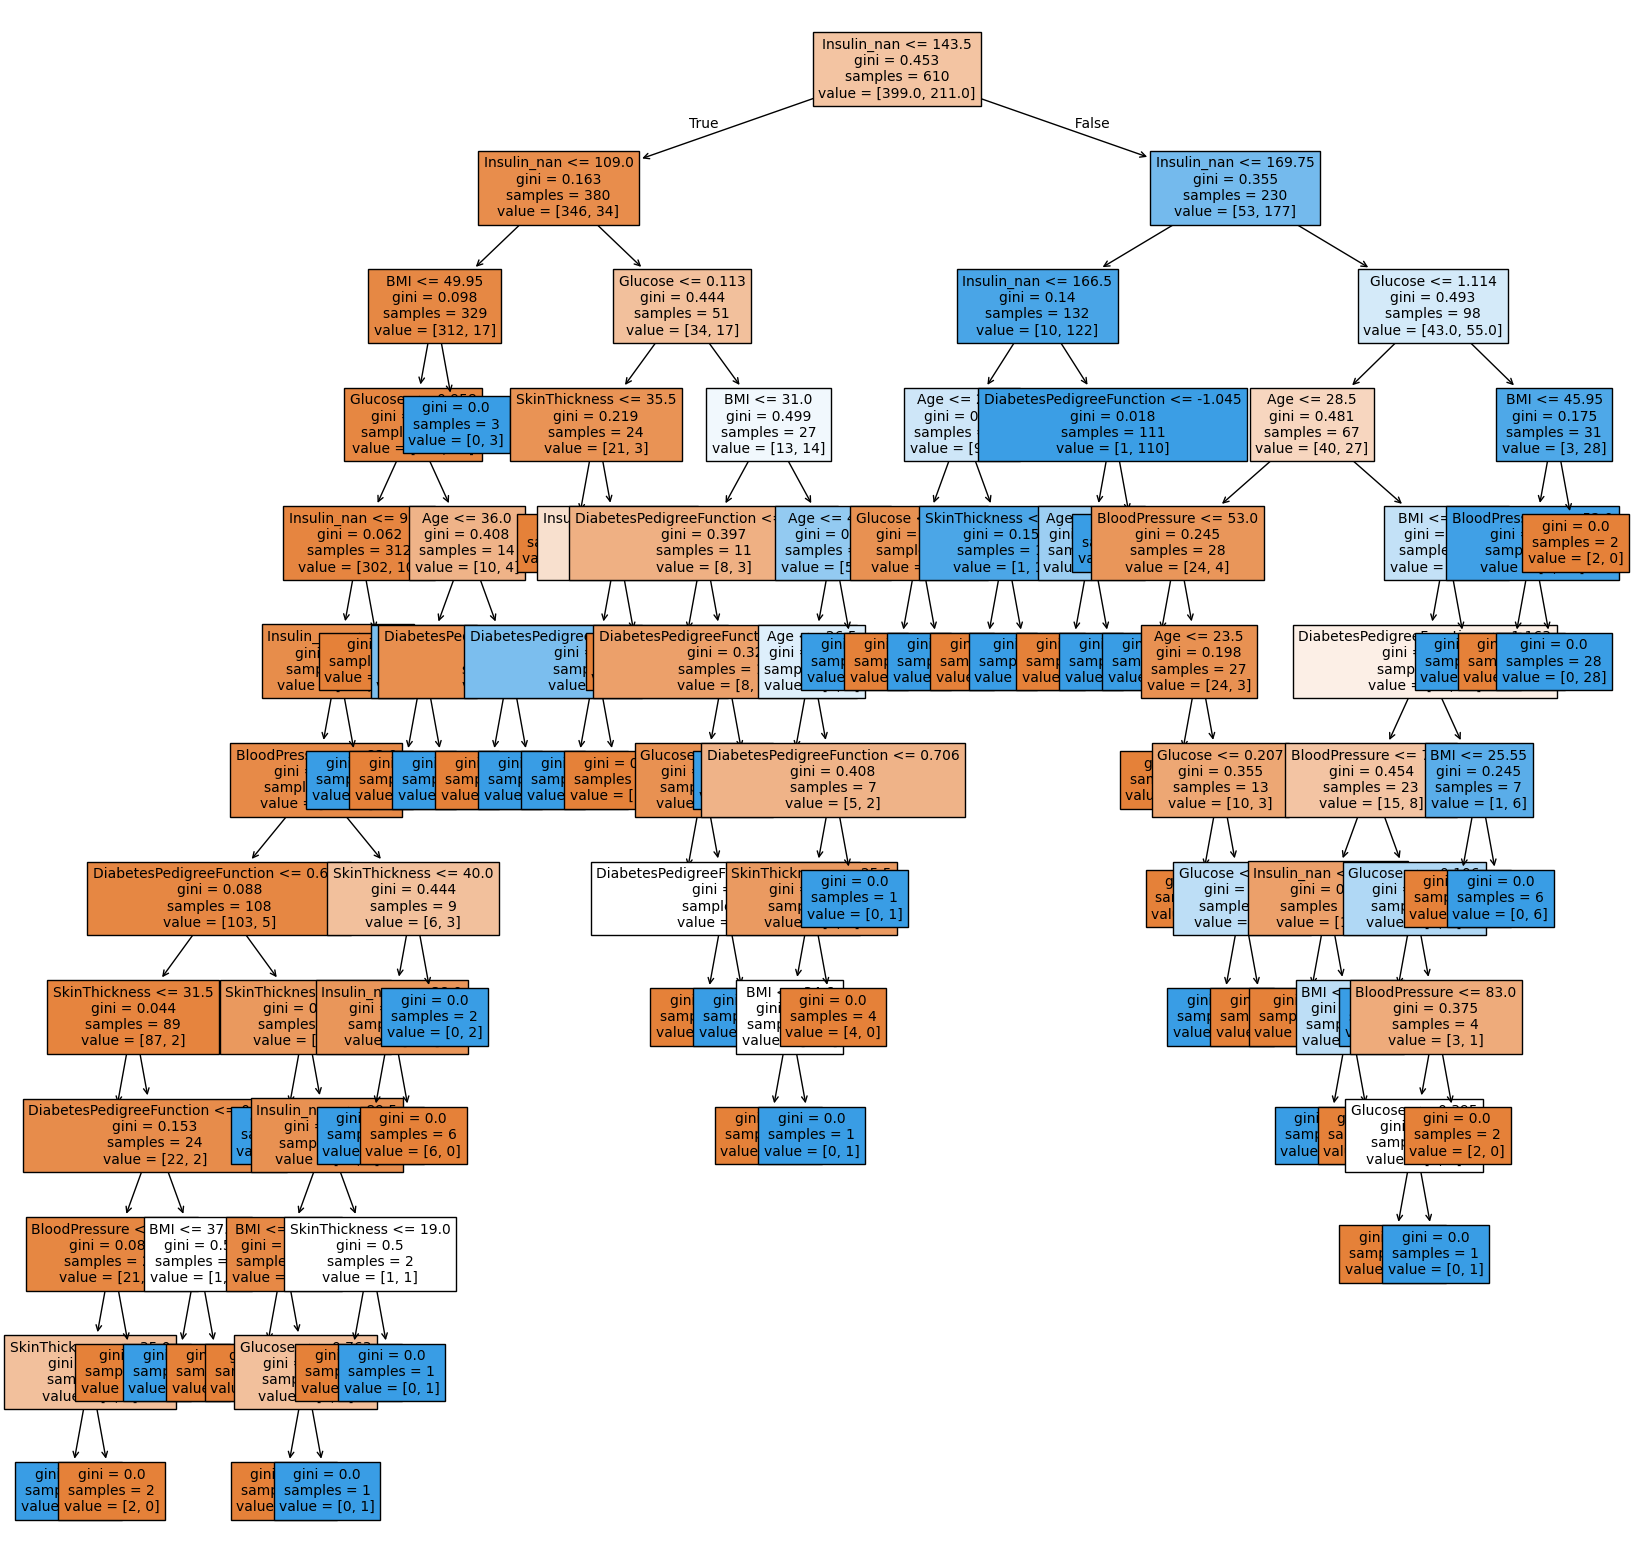

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names=feature_names,
                         filled=True,
                         fontsize=10)

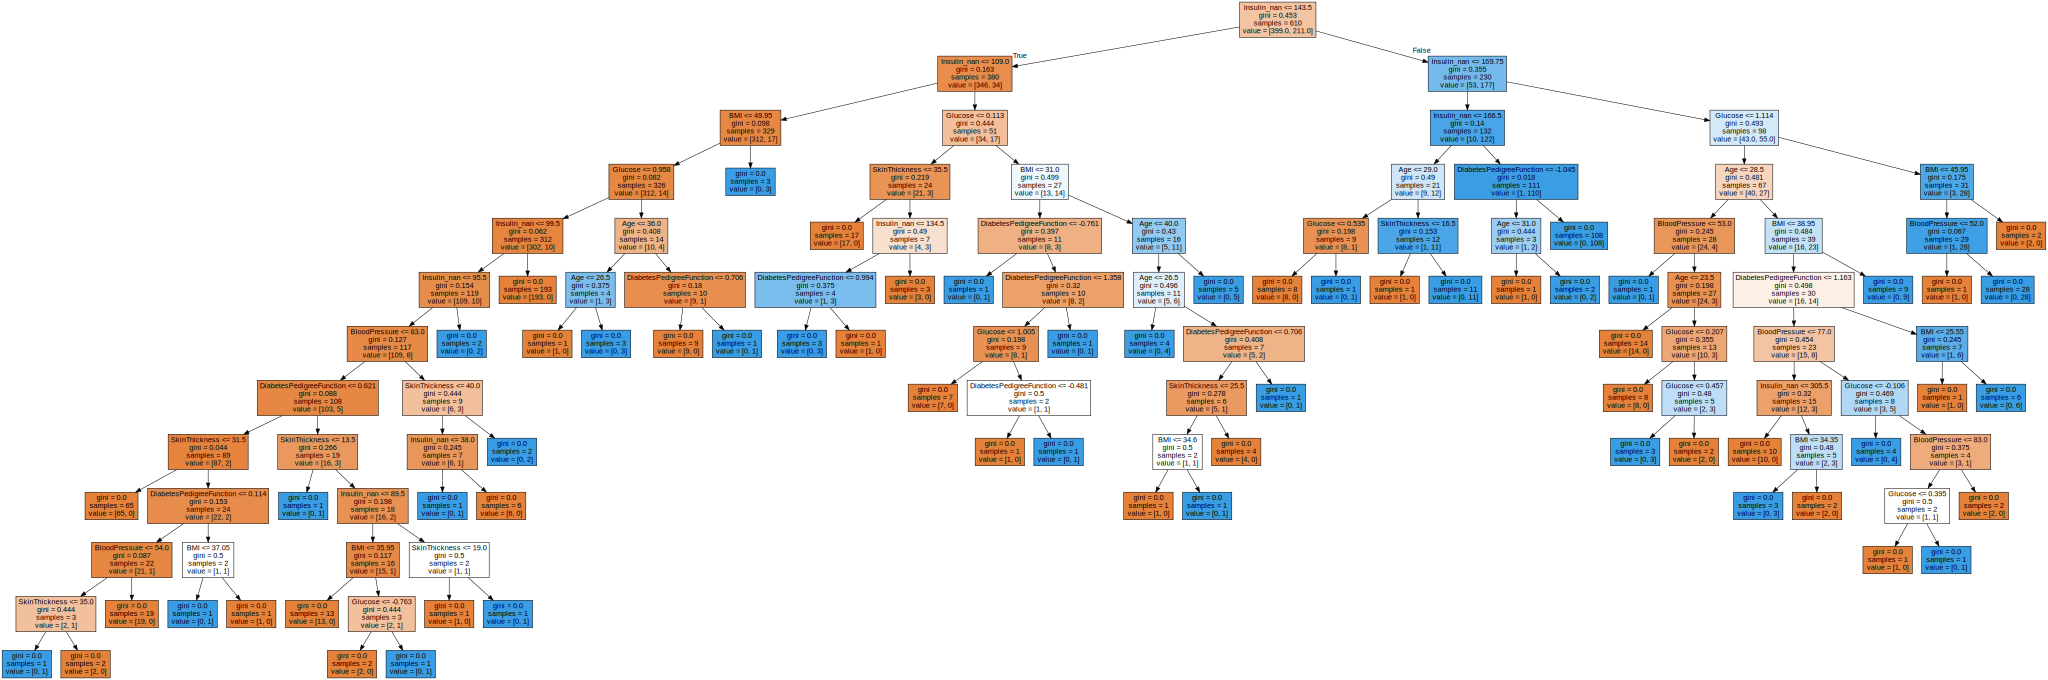

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names = feature_names,
filled=True)
graphviz.Source(dot_tree)

In [ ]:
model.feature_importances_

array([0.10151411, 0.02820108, 0.03869513, 0.07887271, 0.04652081,
       0.08393268, 0.62226348, 0.        ])

<Axes: >

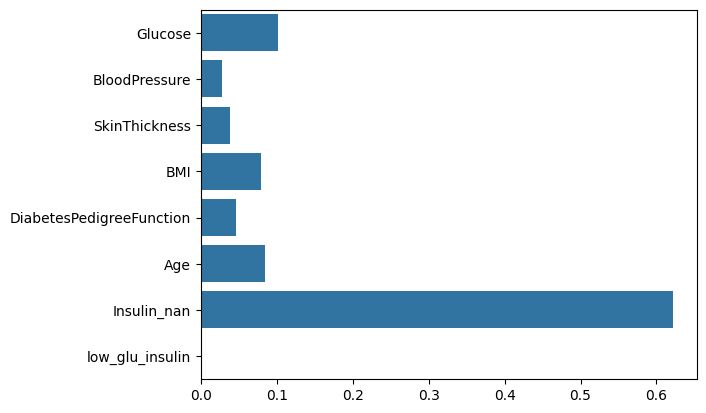

In [ ]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [ ]:
diff_count = abs(y_test - y_predict).sum()
diff_count

np.int64(20)

In [ ]:
y_test == y_predict

,Outcome
614,True
615,True
616,True
617,True
618,True
...,...
763,True
764,True
765,True
766,True


In [ ]:
abs(y_test - y_predict).sum() / len(y_test)

np.float64(0.12987012987012986)

In [ ]:
# 87이 인슐린의 결측치를 중앙값으로 대체
(len(y_test) - diff_count) / len(y_test) * 100

np.float64(87.01298701298701)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8701298701298701

In [ ]:
model.score(X_test, y_test) * 100

87.01298701298701